## **第 4 回　株価データ**
---
---


#### 1. Apple Inc.の日次の株価（Open、High、Low、Close、Volume）をダウンロード

In [2]:
import pandas as pd
import yfinance as yf

# ダウンロードしたい株価データの銘柄シンボルを指定
symbol = "AAPL"  # Apple Inc.の例

# ダウンロードしたい期間を指定します（開始日と終了日）
start_date = "2019-01-01"
end_date = "2022-12-31"

# Yahoo Financeから株価データをダウンロード
data = yf.download(symbol, start=start_date, end=end_date)

# ダウンロードしたデータを表示
df = pd.DataFrame(data)
df = df.drop('Adj Close', axis=1)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,164101200
...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,85438400


#### 2. 終値（Close）に対して ADF検定やKPSS 検定を行ったら非定常過程と判定された。

In [3]:
# ADF 検定
# 帰無仮説 : 時系列は非定常である
from statsmodels.tsa.stattools import adfuller

def ADF(data):
    result = adfuller(data)

    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f'\t {key} : {value}')

    if result[1] < 0.05:
        print("p-value < 0.05 なので帰無仮説を棄却：時系列は定常過程")
    else:
        print("p-value > 0.05 なので帰無仮説を棄却できない：時系列は非定常過程")

ADF(df.Close)

ADF Statistic: -1.681306337710011
p-value: 0.44076883534661077
Critical Values:
	 1% : -3.436866962597422
	 5% : -2.864417284603703
	 10% : -2.5683020002450507
p-value > 0.05 なので帰無仮説を棄却できない：時系列は非定常過程


In [4]:
# KPSS 検定
# 帰無仮説 : 時系列は定常である
from statsmodels.tsa.stattools import kpss
import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning

def KPSS(data):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=InterpolationWarning)
    
        result = kpss(data)

        print(f"KPSS Statistic: {result[0]}")
        print(f"p-value: {result[1]}")
        print(f'Number of lags used: {result[2]}')
        print(f"Critical Values:")
        for key, value in result[3].items():
            print(f'\t {key} : {value}')

        if result[1] < 0.05:
            print("p-value < 0.05 なので帰無仮説を棄却：時系列は非定常過程")        
        else:
            print("p-value > 0.05 なので帰無仮説を棄却できない：時系列は定常過程")

KPSS(df.Close)

KPSS Statistic: 4.761119334849695
p-value: 0.01
Number of lags used: 19
Critical Values:
	 10% : 0.347
	 5% : 0.463
	 2.5% : 0.574
	 1% : 0.739
p-value < 0.05 なので帰無仮説を棄却：時系列は非定常過程


#### 3. 始値（Open）と終値（Close）を使った対数収益率 OtoC を定義。

In [5]:
import numpy as np

# 対数収益率を計算
df['OtoC'] = np.log(df['Close'] / df['Open'])
df

,Open,High,Low,Close,Volume,OtoC
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,148158800,0.019373
2019-01-03,35.994999,36.430000,35.500000,35.547501,365248800,-0.012510
2019-01-04,36.132500,37.137501,35.950001,37.064999,234428400,0.025480
2019-01-07,37.174999,37.207500,36.474998,36.982498,219111200,-0.005192
2019-01-08,37.389999,37.955002,37.130001,37.687500,164101200,0.007925
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,63814900,0.007154
2022-12-27,131.380005,131.410004,128.720001,130.029999,69007800,-0.010329
2022-12-28,129.669998,131.029999,125.870003,126.040001,85438400,-0.028393


#### 4. OtoC に対して ADF検定や KPSS 検定を行ったら定常過程と判定された。

In [6]:
ADF(df.OtoC)

ADF Statistic: -6.686257430754117
p-value: 4.218702145953401e-09
Critical Values:
	 1% : -3.4369994990319355
	 5% : -2.8644757356011743
	 10% : -2.5683331327427803
p-value < 0.05 なので帰無仮説を棄却：時系列は定常過程


In [7]:
KPSS(df.OtoC)

KPSS Statistic: 0.20079517910821928
p-value: 0.1
Number of lags used: 1
Critical Values:
	 10% : 0.347
	 5% : 0.463
	 2.5% : 0.574
	 1% : 0.739
p-value > 0.05 なので帰無仮説を棄却できない：時系列は定常過程


### <span style="color: red">**以下では、対数収益率を使う。**</span>

---
---
#### **課題**
1. ダウ・ジョーンズ工業平均 (Dow Jones Industrial Average: DJIA)を構成する 30 銘柄（以下、DJ30 と呼ぶ）を調べ、DJ30.tsv という名前のファイルにまとめて下さい。その後、pandas の DataFrame で表示　：Wikipedia を参照。

解答例

<img src="figs/1.jpg" width="800px">

---
2. DJ30 の終値を pandas の DataFrame にまとめ。期間は start_date = "2019-01-01"，end_date = "2022-12-31"。その後、欠損値を調べて、欠損値が入っている日付のデータを削除。結果をフォルダ data に data/DJ30_Close.tsv という名前のファイルで保存。

解答例

<img src="figs/2.jpg" width="700px">

<img src="figs/3.jpg" width="900px">

---
3. 2. で作った DataFrame に対して matplotlib を使って、すべての株式のグラフを可視化。

解答例

<img src="figs/4.jpg" width="900px">

---
4. 3. のグラフを比較してわかったことを説明

解答例（省略）

---
5. Apple の場合に計算したように、DJ30 の構成銘柄のそれぞれに対して対数収益率（Open to Close）を計算して pd の DataFrame にまとめ。ただし、2. で欠損値を削除した結果残った日付に注意してデータを収集、整理すること。
解答例

<img src="figs/5.jpg" width="800px">

---
6. 5. で作った DataFrame に対して matplotlib を使って、すべての株式のグラフを可視化。

解答例

<img src="figs/6.jpg" width="900px">



In [8]:
import yfinance as yf

# ダウ・ジョーンズ工業平均を構成する30銘柄のティッカーシンボル
djia_tickers = ['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW', 'XOM',
                'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT',
                'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'RTX', 'VZ', 'V', 'WBA', 'WMT', 'DIS']

# 各銘柄の情報を取得
data = []
for ticker in djia_tickers:
    stock = yf.Ticker(ticker)
    data.append(stock.info)

df = pd.DataFrame(data)
df = df.set_index('symbol')
print(df)
df.to_csv('data/djia.csv', encoding='utf-8-sig')


                                 address1           city state         zip  \
symbol                                                                       
MMM                             3M Center     Saint Paul    MN  55144-1000   
AXP                      200 Vesey Street       New York    NY       10285   
AAPL                   One Apple Park Way      Cupertino    CA       95014   
BA                  929 Long Bridge Drive      Arlington    VA       22202   
CAT         5205 North O'Connor Boulevard         Irving    TX       75039   
CVX            6001 Bollinger Canyon Road      San Ramon    CA  94583-2324   
CSCO                170 West Tasman Drive       San Jose    CA  95134-1706   
KO                    One Coca-Cola Plaza        Atlanta    GA       30313   
DOW                     2211 H.H. Dow Way        Midland    MI       48674   
XOM     22777 Springwoods Village Parkway         Spring    TX  77389-1425   
GS                        200 West Street       New York    NY  

In [9]:
import pandas as pd

df = pd.read_csv('data/DJ30.tsv', sep='\t')
df = df.rename(columns={'Unnamed: 0': 'symbol'})
df

,symbol,企業名,企業名2,業種,採用日,上場市場
0,AAPL,Apple Inc.,Apple,コンピュータ,2015年3月19日,NASDAQ
1,AMGN,Amgen Inc.,アムジェン,医薬品,2020年8月31日,NASDAQ
2,AXP,American Express Co.,アメリカン・エキスプレス,金融,1982年8月30日,NYSE
3,BA,Boeing Co.,ボーイング,航空機,1987年3月12日,NYSE
4,CAT,Caterpillar Inc.,キャタピラー,重機,1991年5月6日,NYSE
5,CRM,"Salesforce.com, Inc.",セールスフォース・ドットコム,ソフトウェア,2020年8月31日,NYSE
6,CSCO,"Cisco Systems, Inc.",シスコシステムズ,情報・通信業,2009年6月8日,NASDAQ
7,CVX,Chevron Corp.,シェブロン,石油,2008年2月19日,NYSE
8,DIS,The Walt Disney Co.,ウォルト・ディズニー・カンパニー,娯楽・メディア,1991年5月6日,NYSE
9,DOW,"Dow, Inc.",ダウ,化学,2019年4月2日,NYSE


# 2

In [10]:
import yfinance as yf
import pandas as pd

# ダウ・ジョーンズ工業平均を構成する30銘柄のティッカーシンボル
djia_tickers = df['symbol'].tolist()

# 指定された期間
start_date = "2019-01-01"
end_date = "2022-12-31"

# 各銘柄の終値を取得し、データフレームに格納
data = yf.download(djia_tickers, start=start_date, end=end_date)['Close']
# データフレームを表示
df_close = pd.DataFrame(data)
df_close = df_close.dropna(how='all', axis=1)
df_close = df_close.dropna(how='any', axis=0)
print(df_close)

df_close.to_csv('data/djia_close.csv', encoding='utf-8-sig')

[*********************100%%**********************]  30 of 30 completed
                  AAPL        AMGN         AXP          BA         CAT  \
Date                                                                     
2019-03-20   47.040001  191.119995  110.769997  376.160004  133.009995   
2019-03-21   48.772499  191.889999  111.820000  372.700012  134.059998   
2019-03-22   47.762501  186.699997  109.459999  362.170013  129.770004   
2019-03-25   47.185001  186.589996  109.040001  370.459991  131.380005   
2019-03-26   46.697498  188.270004  109.500000  370.380005  131.839996   
...                ...         ...         ...         ...         ...   
2022-12-23  131.860001  263.920013  147.020004  189.059998  239.869995   
2022-12-27  130.029999  263.390015  146.389999  189.399994  243.139999   
2022-12-28  126.040001  261.420013  144.009995  188.380005  239.380005   
2022-12-29  129.610001  263.160004  147.320007  188.910004  240.199997   
2022-12-30  129.929993  262.640015  147.7

# 3

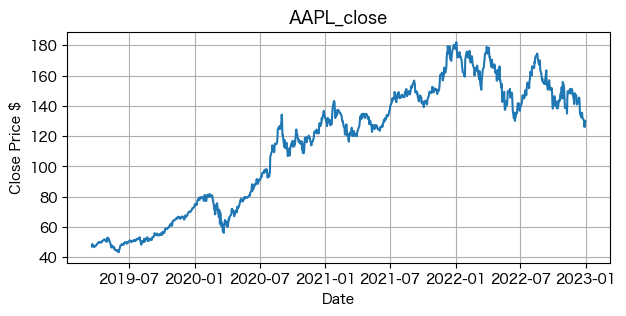

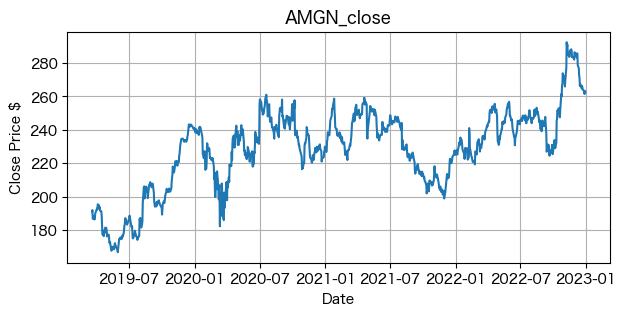

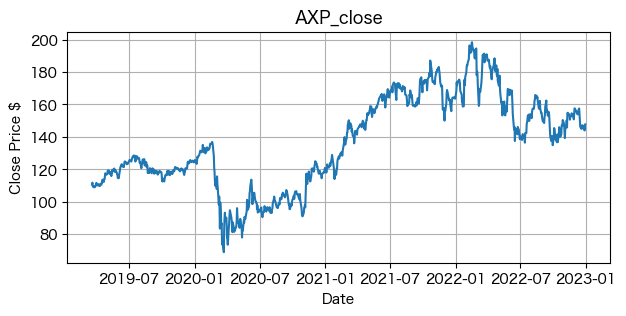

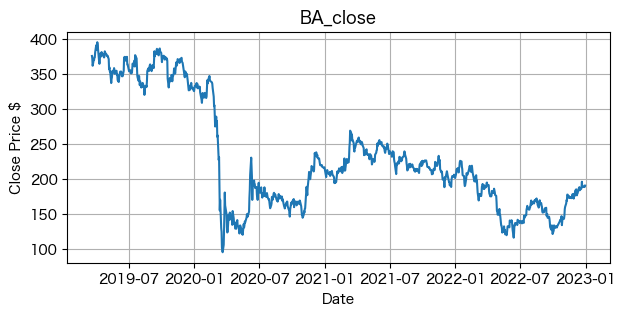

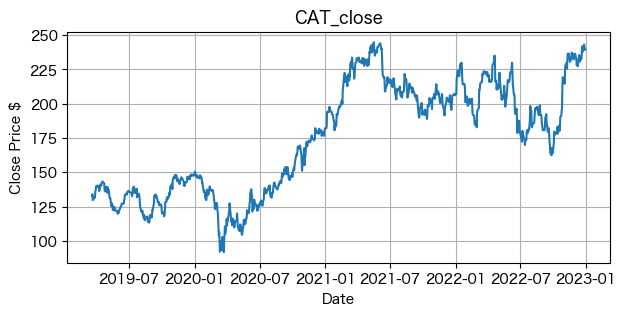

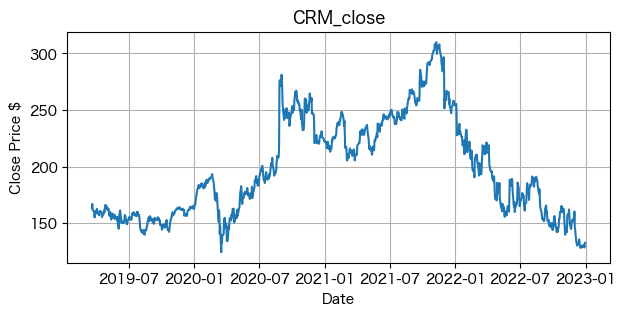

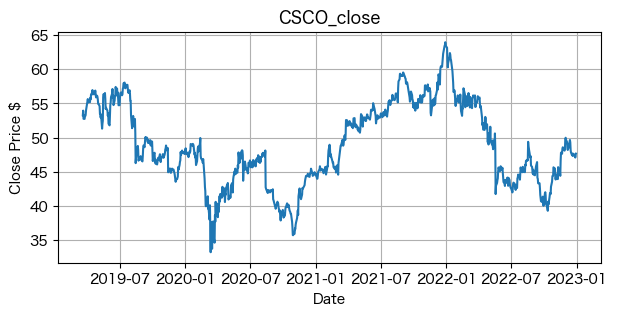

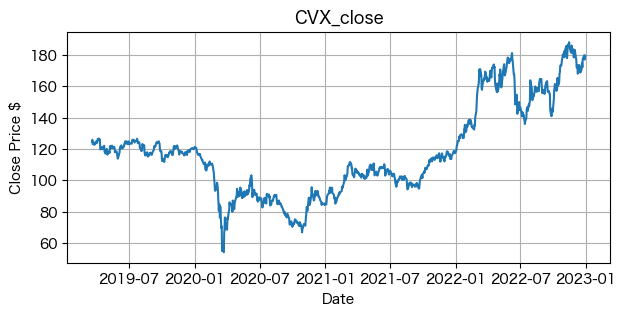

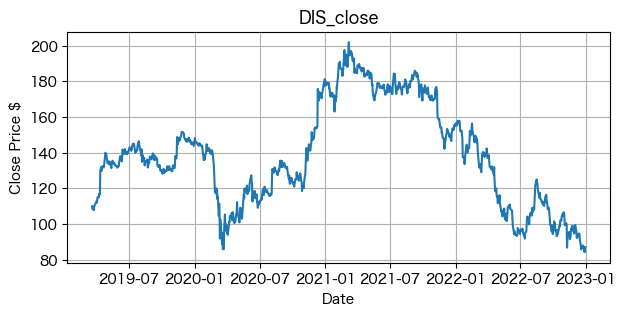

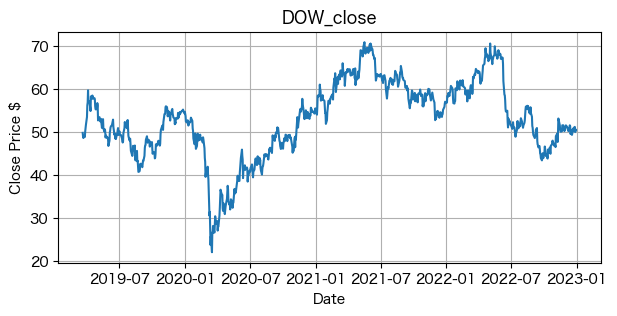

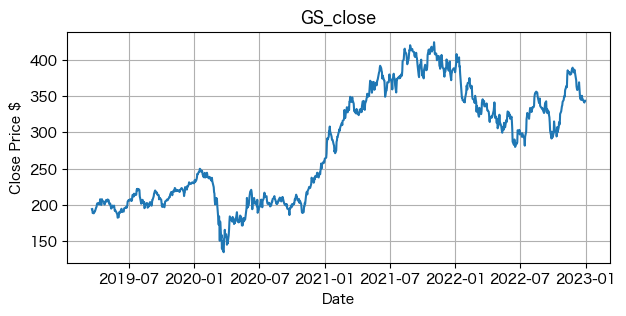

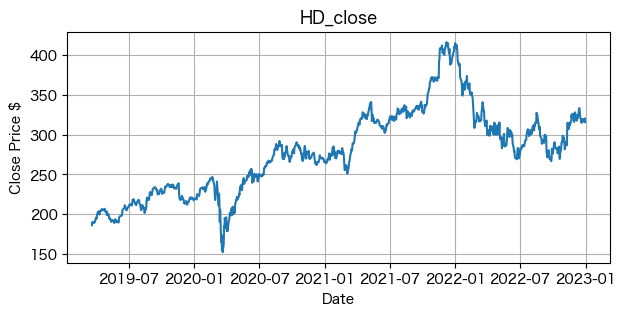

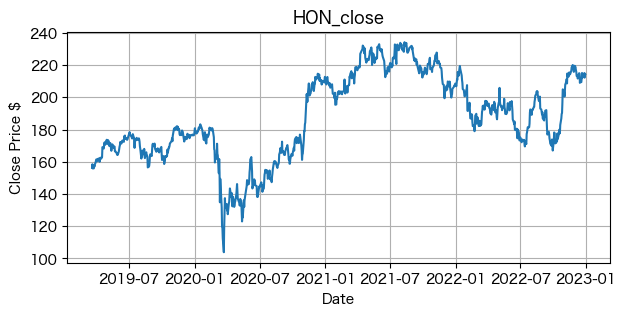

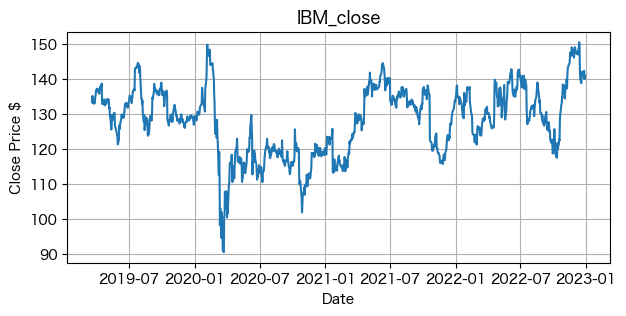

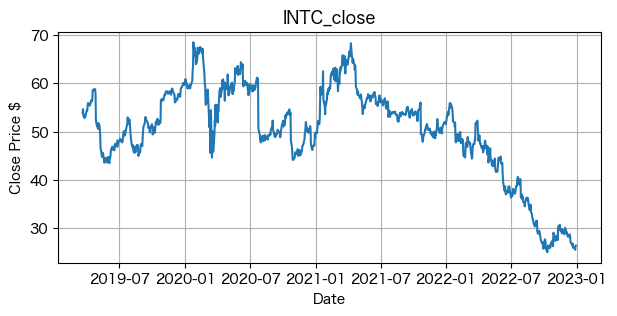

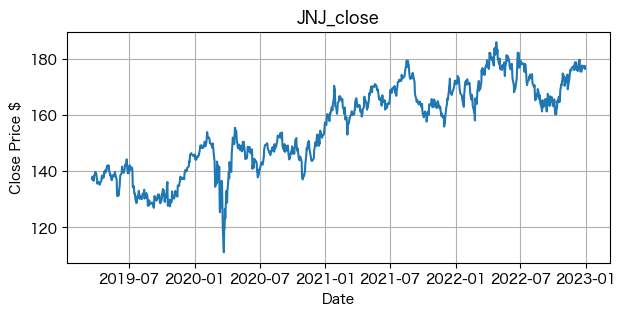

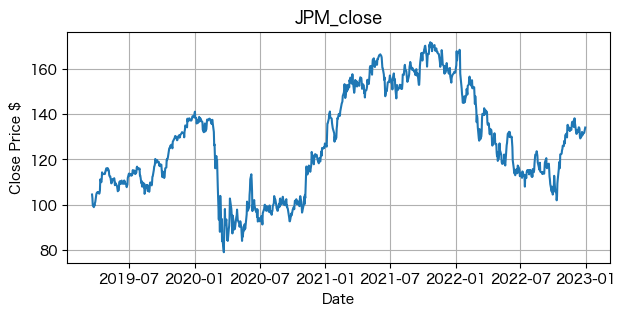

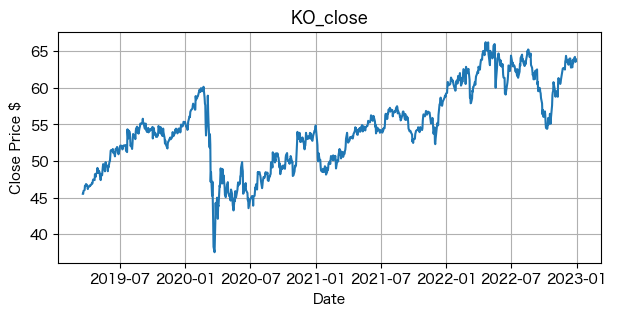

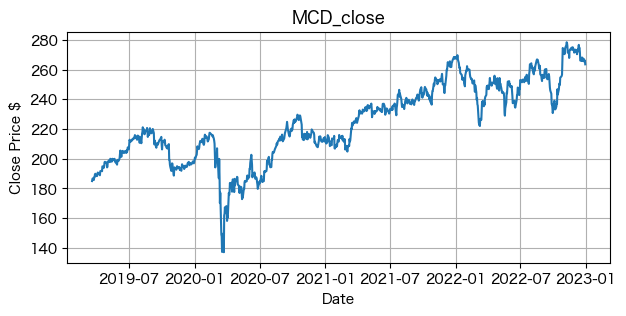

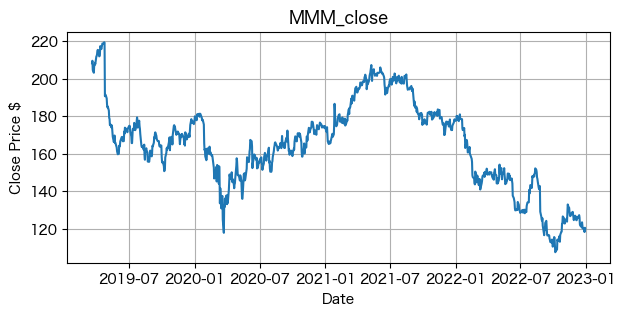

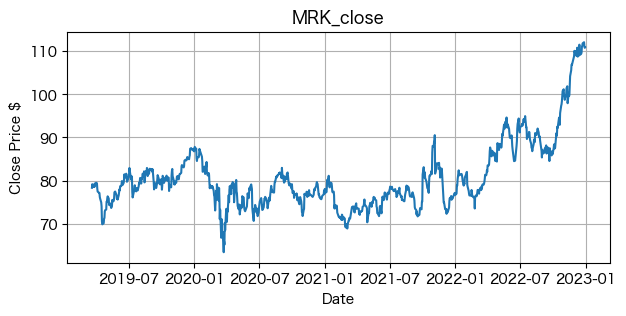

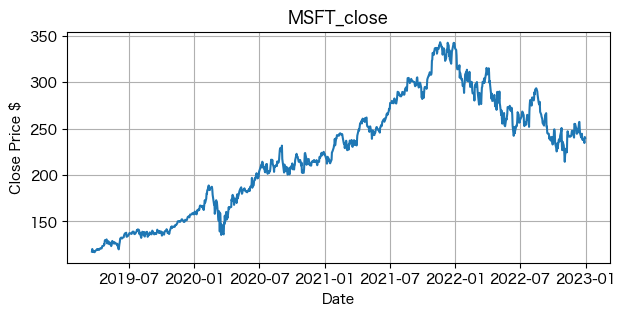

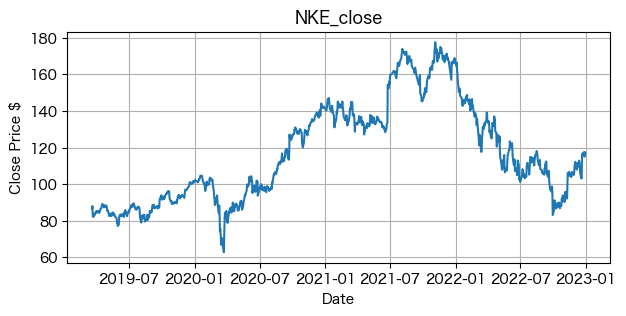

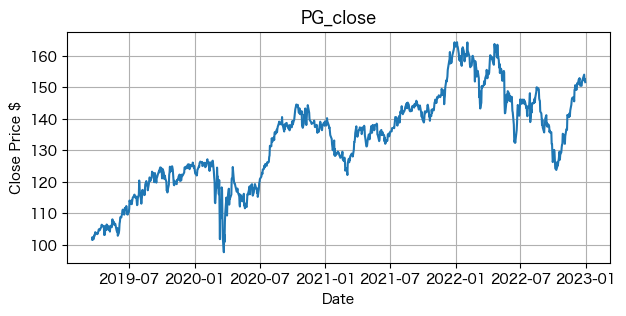

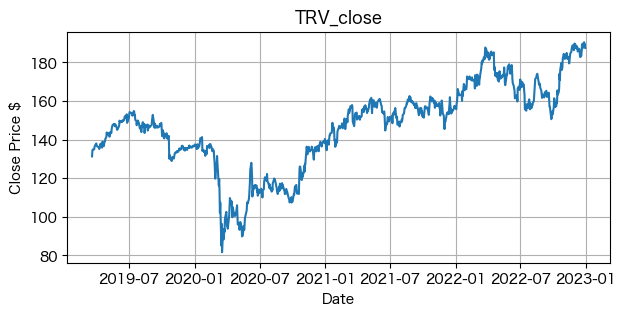

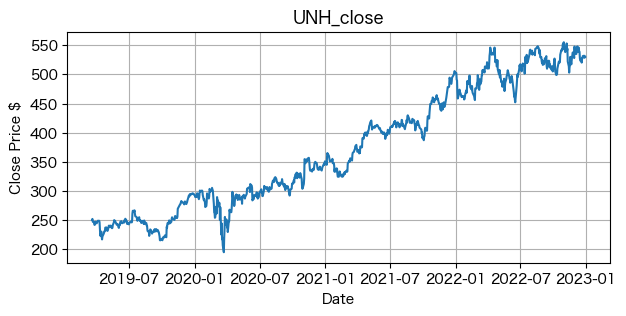

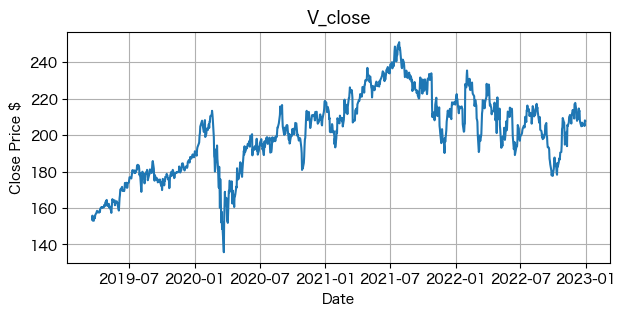

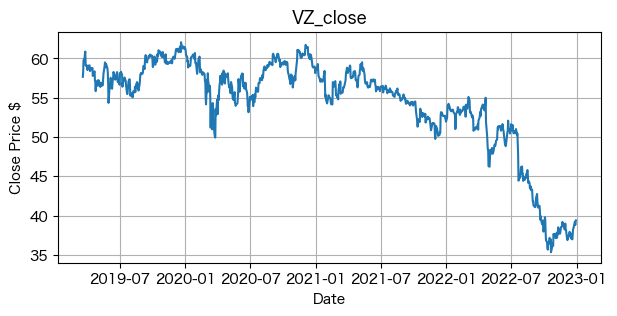

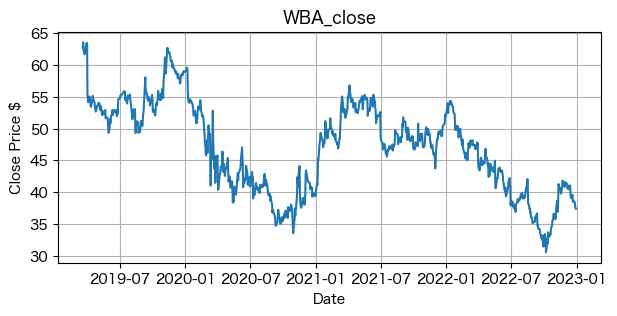

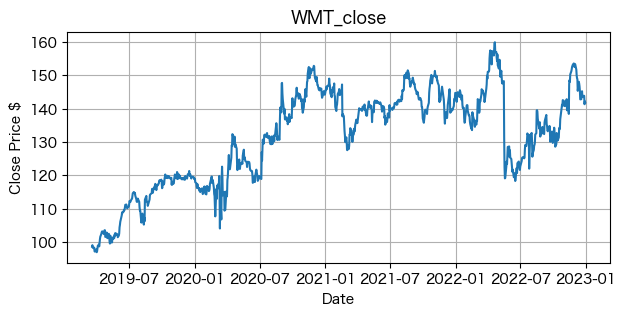

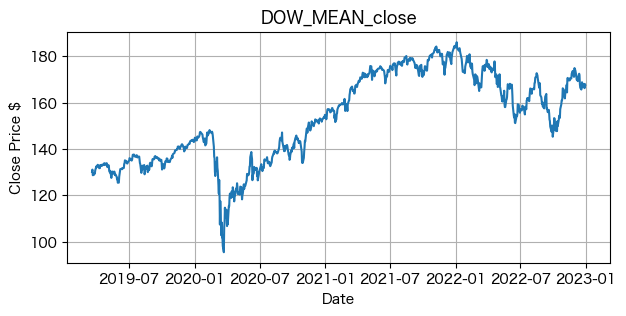

In [11]:
import matplotlib.pyplot as plt

# 平均値を算出
df_close['DOW_MEAN'] = df_close.mean(axis=1)
# 各銘柄ごとにグラフを作成
for column in df_close.columns:
    plt.figure(figsize=(7, 3))  # グラフのサイズを設定
    plt.plot(df_close.index, df_close[column])  # データをプロット
    plt.title(f"{column}_close")  # タイトルをカラム名に設定
    plt.xlabel('Date')  # x軸のラベルを設定
    plt.ylabel('Close Price $')  # y軸のラベルを設定
    plt.grid(True)  # グリッドを表示
    plt.show()  # グラフを表示


# グラフを一つにまとめる

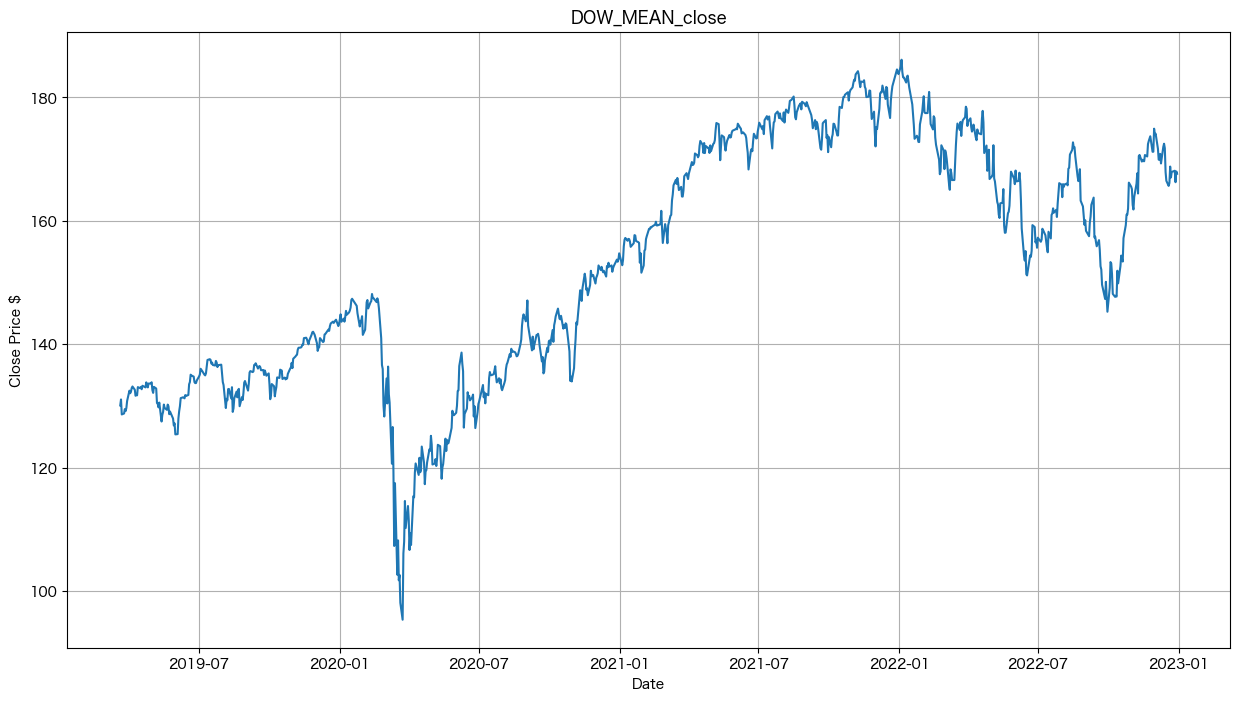

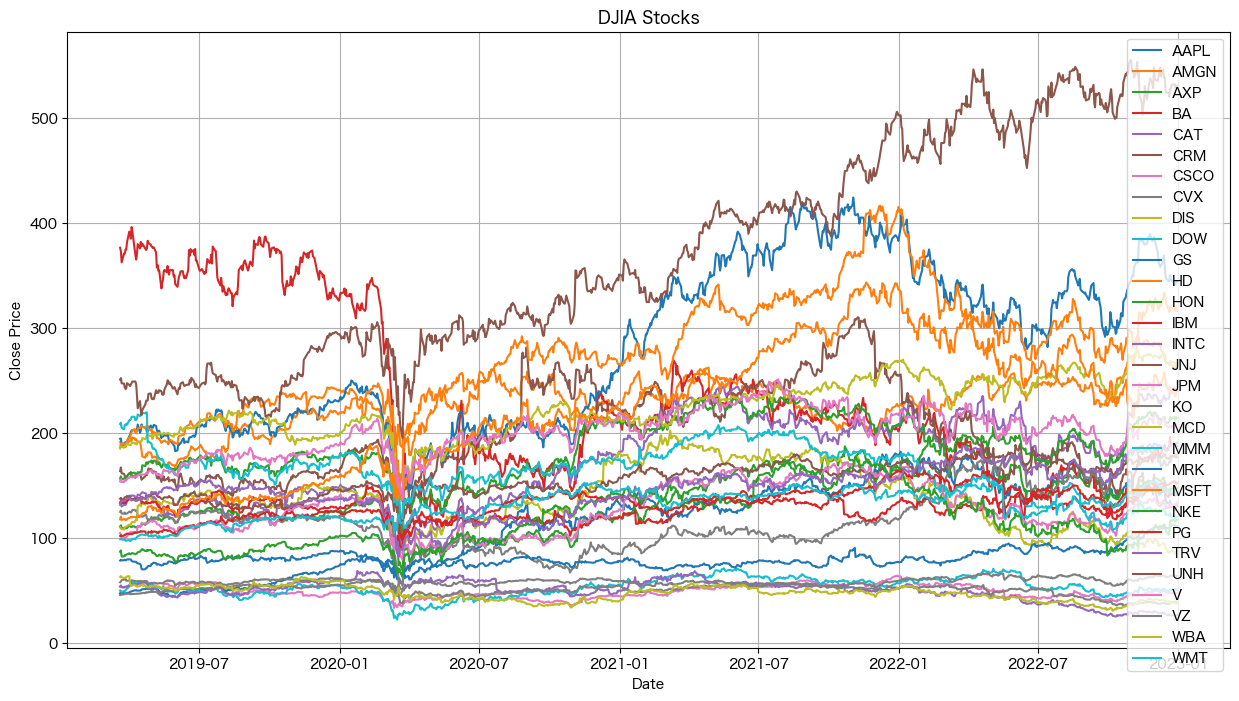

In [12]:
import matplotlib.pyplot as plt

# 同じグラフ内にすべての銘柄をプロット



plt.figure(figsize=(15, 8))  # グラフのサイズを設定
plt.plot(df_close.index, df_close['DOW_MEAN'])  # データをプロット
plt.title('DOW_MEAN_close')  # タイトルをカラム名に設定
plt.xlabel('Date')  # x軸のラベルを設定
plt.ylabel('Close Price $')  # y軸のラベルを設定
plt.grid(True)  # グリッドを表示
plt.show()  # グラフを表示




plt.figure(figsize=(15, 8))  # グラフのサイズを設定
for column in df_close.columns:
    if column == 'DOW_MEAN':
        continue
        
    else:
        plt.plot(df_close.index, df_close[column], label=column)  # 他のデータをプロット
plt.title('DJIA Stocks')  # タイトルを設定
plt.xlabel('Date')  # x軸のラベルを設定
plt.ylabel('Close Price')  # y軸のラベルを設定
plt.legend()  # 凡例を表示
plt.grid(True)  # グリッドを表示
plt.show()  # グラフを表示


# 考察

### どの銘柄もコロナが発生したあたりから株価が著しく低下し、その後回復傾向にある。
### 特にコロナ発生後はセールスフォースの成長が目立つ。
### 事前に企業が要諦していないことが起こると大きな打撃を受けることがわかる。